#### Matplotlib 

Matplotlib 是 Python 的绘图库。 它可与 NumPy 一起使用，提供了一种有效的 MatLab 开源替代方案。 它也可以和图形工具包一起使用。它有一套完全仿照MATLAB的函数形式的绘图接口，在matplotlib.pyplot模块中。这套函数接口方便MATLAB用户过度到matplotlib包。 

官网： http://matplotlib.org/

**配置参数**：

axes: 设置坐标轴边界和表面的颜色、坐标刻度值大小和网格的显示

figure: 控制dpi、边界颜色、图形大小、和子区( subplot)设置

font: 字体集（font family）、字体大小和样式设置

grid: 设置网格颜色和线性

legend: 设置图例和其中的文本的显示

line: 设置线条（颜色、线型、宽度等）和标记

savefig: 可以对保存的图形进行单独设置。例如，设置渲染的文件的背景为白色。

xticks和yticks: 为x,y轴的主刻度和次刻度设置颜色、大小、方向，以及标签大小。



**学习资源**：

- 官网资源
 1. http://matplotlib.org/examples/index.html
 2. http://matplotlib.org/gallery.html


- Matplotlib 数据可视化神器 莫烦 [Here](https://morvanzhou.github.io/tutorials/data-manipulation/plt/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#matplotlib.rcParams['axes.unicode_minus']=False

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects.

You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:

![Figure object](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

matplotlib.figure.Figure

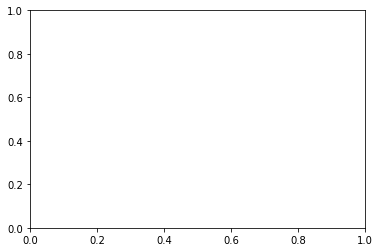

In [3]:
fig, _ = plt.subplots()
type(fig)

we created two variables with plt.subplots(). The first is a top-level Figure object. The second is a “throwaway” variable that we don’t need just yet, denoted with an underscore. Using attribute notation, it is easy to traverse down the figure hierarchy and see the first tick of the y axis of the first Axes object

In [4]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

Above, fig (a Figure class instance) has multiple Axes (a list, for which we take the first element). Each Axes has a y-axis and x-axis, each of which have a collection of “major ticks,” and we grab the first one.

The prescribed way to create a Figure with a single Axes under the OO approach is (object-oriented) with plt.subplots(). This is really the only time that the OO approach uses pyplot, to create a Figure and Axes:

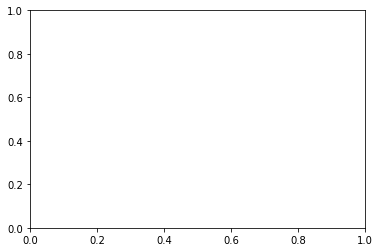

In [4]:
fig, ax = plt.subplots()

Let’s illustrate with a stacked area graph of three time series:

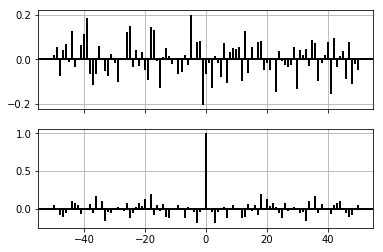

In [3]:

# Fixing random state for reproducibility
np.random.seed(10000)


x, y = np.random.randn(2, 100)
_, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)

plt.show()

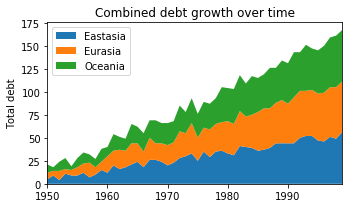

In [5]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

- After creating three random time series, we defined one Figure (fig) containing one Axes (a plot, ax).

- We call methods of ax directly to create a stacked area chart and to add a legend, title, and y-axis label. Under the object-oriented approach, it’s clear that all of these are attributes of ax.

- tight_layout() applies to the Figure object as a whole to clean up whitespace padding.

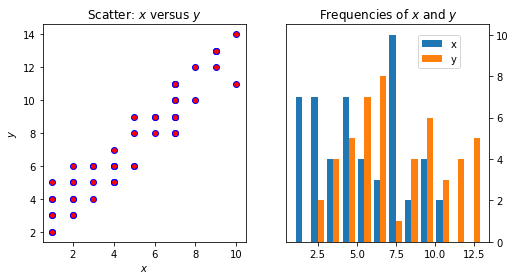

In [20]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

There’s a little bit more going on in this example:

- Because we’re creating a “1x2” Figure, the returned result of plt.subplots(1, 2) is now a Figure object and a NumPy array of Axes objects. (You can inspect this with fig, axs = plt.subplots(1, 2) and taking a look at axs.)

- We deal with ax1 and ax2 individually, which would be difficult to do with the stateful approach. The final line is a good illustration of the object hierarchy, where we are modifying the yaxis belonging to the second Axes, placing its ticks and ticklabels to the right.

- Text inside dollar signs utilizes TeX markup to put variables in italics.

In [21]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

The “response” variable y below, to use the statistical term, is an area’s average home value. pop and age are the area’s population and average house age, respectively:

In [29]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

(array([1.530e+02, 1.500e+02, 1.740e+02, 1.970e+02, 2.490e+02, 3.690e+02,
        3.910e+02, 5.660e+02, 6.550e+02, 7.950e+02, 9.440e+02, 9.470e+02,
        1.025e+03, 9.710e+02, 9.140e+02, 9.640e+02, 8.840e+02, 7.970e+02,
        7.410e+02, 7.590e+02, 6.260e+02, 6.010e+02, 5.460e+02, 4.750e+02,
        4.750e+02, 4.210e+02, 3.620e+02, 3.220e+02, 3.360e+02, 2.960e+02,
        2.600e+02, 2.540e+02, 2.110e+02, 1.960e+02, 1.730e+02, 1.440e+02,
        1.330e+02, 1.350e+02, 1.180e+02, 1.170e+02, 1.100e+02, 1.050e+02,
        8.600e+01, 7.800e+01, 6.600e+01, 7.100e+01, 7.400e+01, 6.200e+01,
        5.300e+01, 6.700e+01, 5.900e+01, 5.200e+01, 4.100e+01, 5.800e+01,
        3.500e+01, 3.400e+01, 3.700e+01, 2.300e+01, 3.100e+01, 3.700e+01,
        3.800e+01, 2.700e+01, 3.000e+01, 3.000e+01, 2.200e+01, 1.500e+01,
        2.400e+01, 1.600e+01, 1.900e+01, 1.700e+01, 1.200e+01, 1.700e+01,
        1.500e+01, 1.500e+01, 1.400e+01, 5.000e+00, 6.000e+00, 1.700e+01,
        1.200e+01, 9.000e+00, 6.000e+0

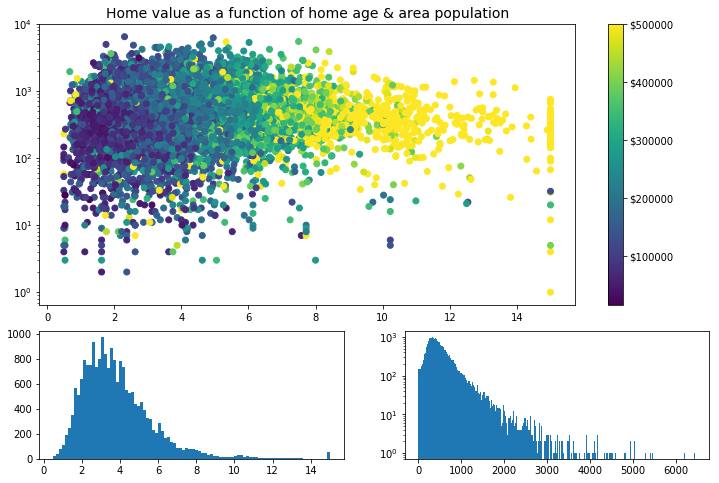

In [33]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y)
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

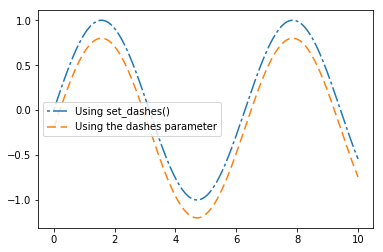

In [21]:

x = np.linspace(0, 10, 500)
y = np.sin(x)

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y - 0.2, dashes=[6,3], label='Using the dashes parameter')

ax.legend()
plt.show()



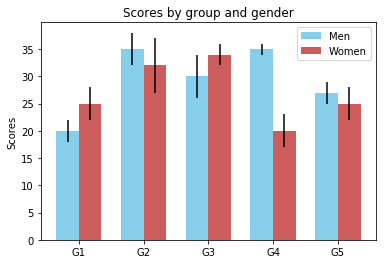

In [38]:

men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
ax.bar(ind + width/2, women_means, width, yerr=women_std,
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

plt.show()


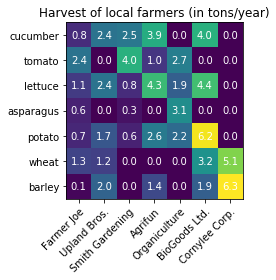

In [22]:
import matplotlib
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment. 
# setp: set property
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()


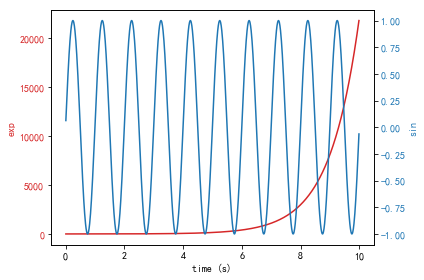

In [35]:

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


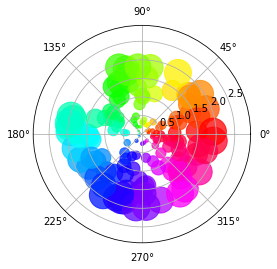

In [28]:

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar') # “111”表示“1×1网格，第一子图”
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)
plt.show()

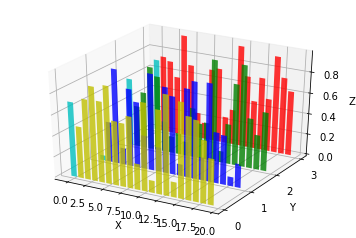

In [33]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()



#### 作业

1. 